In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys, os
sys.path.append(os.path.abspath("../.."))
from configs import GOOGLE_APPLICATION_CREDENTIALS,GCS_BUCKET_NAME,GCS_PROJECT_ID
from google.cloud import bigquery
from src.utils.io_utils import upload_to_bigquery
from clean_utils import *

In [2]:
client = bigquery.Client.from_service_account_json(GOOGLE_APPLICATION_CREDENTIALS)
table_id = f"{GCS_PROJECT_ID}.{GCS_BUCKET_NAME}.data_cleaned"

In [3]:
query = """SELECT *
FROM `khangtestdbt.xecupredict.oto_com` """
data_oto = client.query(query).to_dataframe()
data_oto.head(1)

,Name,Price,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua
0,Hyundai Santa Fe 2021,780 triệu,2021,Máy xăng,SUV,Xe cũ,70.000 km,Số tự động,None,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ


In [4]:
df_oto = data_oto.copy()

In [5]:
df_oto.columns

Index(['Name', 'Price', 'Năm_SX', 'Nhiên_liệu', 'Kiểu_dáng', 'Tình_trạng',
       'Km_đã_đi', 'Hộp_số', 'Xuất_xứ', 'Tỉnh_thành', 'Số_tiền_vay',
       'Thời_gian_vay', 'Lãi_xuất', 'Loại_hình', 'Giá_trị_xe_muốn_mua'],
      dtype='object')

In [6]:
df_oto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 1488 non-null   object
 1   Price                1488 non-null   object
 2   Năm_SX               1488 non-null   object
 3   Nhiên_liệu           1488 non-null   object
 4   Kiểu_dáng            1410 non-null   object
 5   Tình_trạng           1488 non-null   object
 6   Km_đã_đi             1473 non-null   object
 7   Hộp_số               1486 non-null   object
 8   Xuất_xứ              1462 non-null   object
 9   Tỉnh_thành           1488 non-null   object
 10  Số_tiền_vay          1488 non-null   object
 11  Thời_gian_vay        1488 non-null   object
 12  Lãi_xuất             1488 non-null   object
 13  Loại_hình            1488 non-null   object
 14  Giá_trị_xe_muốn_mua  1488 non-null   object
dtypes: object(15)
memory usage: 174.5+ KB


In [7]:
df_oto.describe(include='all').T

,count,unique,top,freq
Name,1488,1108,VinFast VF8 Eco 2023,19
Price,1488,559,450 triệu,19
Năm_SX,1488,26,2022,227
Nhiên_liệu,1488,4,Máy xăng,1204
Kiểu_dáng,1410,13,SUV,560
Tình_trạng,1488,1,Xe cũ,1488
Km_đã_đi,1473,314,90.000 km,53
Hộp_số,1486,3,Số tự động,1325
Xuất_xứ,1462,2,Trong nước,793
Tỉnh_thành,1488,148,Quận 7 - Tp.HCM,137


1.name

In [8]:
df_oto["name"] = df_oto["Name"].apply(clean_name)
df_oto.drop(columns=["Name"], inplace=True)
df_oto.head(5)

,Price,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name
0,780 triệu,2021,Máy xăng,SUV,Xe cũ,70.000 km,Số tự động,None,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2021
1,685 triệu,2020,Máy xăng,SUV,Xe cũ,78.000 km,Số tự động,None,Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Tucson 2020
2,555 triệu,2017,Máy dầu,Van/Minivan,Xe cũ,130.000 km,Số sàn,Nhập khẩu,Cầu Giấy - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 4 MT 2017
3,450 triệu,2017,Máy dầu,Van/Minivan,Xe cũ,15.000 km,Số sàn,Nhập khẩu,Đông Anh - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 4 MT 2017
4,555 triệu,2017,Máy dầu,Van/Minivan,Xe cũ,130.000 km,Số sàn,Nhập khẩu,Cầu Giấy - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 5 MT 2017


2.price

In [9]:
df_oto["Price"].isna().sum()

np.int64(0)

In [10]:
df_oto["price"] = df_oto["Price"].apply(cv_price)
df_oto.drop(columns=["Price"], inplace=True)
df_oto.head(5)

,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price
0,2021,Máy xăng,SUV,Xe cũ,70.000 km,Số tự động,None,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2021,780000000.0
1,2020,Máy xăng,SUV,Xe cũ,78.000 km,Số tự động,None,Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Tucson 2020,685000000.0
2,2017,Máy dầu,Van/Minivan,Xe cũ,130.000 km,Số sàn,Nhập khẩu,Cầu Giấy - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 4 MT 2017,555000000.0
3,2017,Máy dầu,Van/Minivan,Xe cũ,15.000 km,Số sàn,Nhập khẩu,Đông Anh - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 4 MT 2017,450000000.0
4,2017,Máy dầu,Van/Minivan,Xe cũ,130.000 km,Số sàn,Nhập khẩu,Cầu Giấy - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Grand Starex 2 5 MT 2017,555000000.0


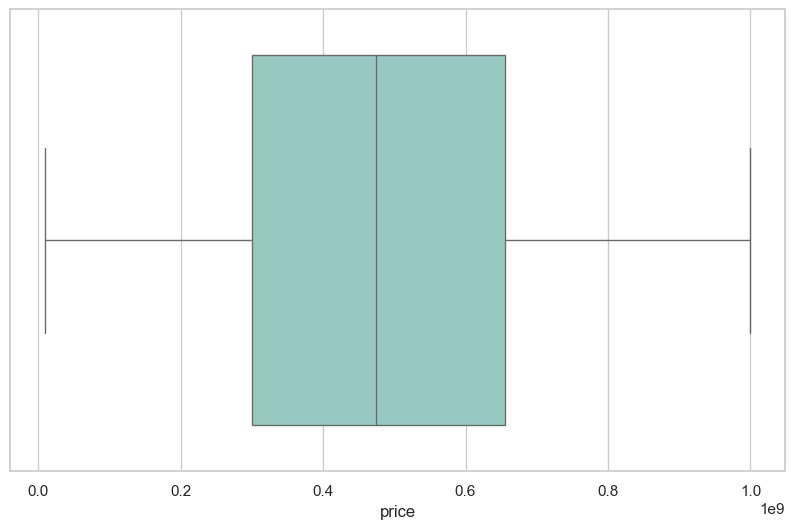

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") 

plt.figure(figsize=(10,6))
ax = sns.boxplot(
    x="price",
    data=df_oto,
    palette="Set3"  
)
plt.show()


In [12]:
cheapest_5 = df_oto.nsmallest(5, 'price')
cheapest_5


,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price
1192,2022,Máy dầu,SUV,Xe cũ,01 km,Số tự động,Trong nước,Thanh Liêm - Hà Nam,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Toyota Fortuner 2 4G 4x2 AT 2022,10000000.0
831,2023,Máy dầu,SUV,Xe cũ,27.600 km,Số tự động,Nhập khẩu,Quận 12 - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Ford Everest Ambiente 2 0 AT 4x2 2023,15000000.0
1219,2004,Máy xăng,None,Xe cũ,100.000 km,Số sàn,Nhập khẩu,Hoài Đức - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Toyota Hiace 2004,28000000.0
940,2015,Máy xăng,Sedan,Xe cũ,130.000 km,Số tự động,Trong nước,Cầu Giấy - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Mercedes Benz S400 3 0 V6 2015,30000000.0
51,2021,Máy dầu,SUV,Xe cũ,53.010 km,Số tự động,Trong nước,Thanh Xuân - Hà Nội,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2 2 Dầu Cao cấp 2021,35000000.0


In [13]:
most_expensive_5 = df_oto.nlargest(5, 'price')
most_expensive_5

,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price
162,2013,Máy xăng,SUV,Xe cũ,115.000 km,Số tự động,Nhập khẩu,Quận 7 - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Land Rover Range Rover AutoBiography 3 0 2013,999000000.0
321,2020,Máy xăng,SUV,Xe cũ,14.000 km,Số tự động,Nhập khẩu,Quận 7 - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Mercedes Benz AMG G63 4 0 v8 2020,999000000.0
341,2024,Máy xăng,SUV,Xe cũ,8.000 km,Số tự động,Nhập khẩu,Gò Vấp - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Mercedes Benz GLC 200 4Matic 2024,999000000.0
360,2019,Máy xăng,Sedan,Xe cũ,89.000 km,Số tự động,Trong nước,Bình Tân - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Mercedes Benz C300 AMG 2019,999000000.0
361,2019,Máy xăng,Sedan,Xe cũ,66.000 km,Số tự động,Trong nước,Bình Tân - Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Mercedes Benz E200 E200 2019,999000000.0


3.brand

In [14]:
df_oto.head(1)

,Năm_SX,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price
0,2021,Máy xăng,SUV,Xe cũ,70.000 km,Số tự động,None,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2021,780000000.0


In [15]:
df_oto["brand"] = df_oto["name"].str.strip().str.split().str[0]

In [16]:
df_oto.brand.value_counts()

brand
Toyota         201
Ford           178
Hyundai        163
Mercedes       160
Kia            156
VinFast        111
Mazda           98
Mitsubishi      65
Honda           64
BMW             43
Lexus           32
Peugeot         26
Porsche         25
Volvo           23
MG              21
Nissan          19
Suzuki          18
Chevrolet       18
Audi            14
Volkswagen       8
Land             8
Isuzu            5
Rolls            4
Mini             4
Daewoo           4
Subaru           3
Fuso             2
Dongben          2
KenBo            1
Luxgen           1
Lamborghini      1
Jeep             1
Lynk             1
Ferrari          1
Citroen          1
Acura            1
Bentley          1
Skoda            1
Omoda            1
Thaco            1
Smart            1
Name: count, dtype: int64

4.year

In [17]:
df_oto["Năm_SX"].head(5)

0    2021
1    2020
2    2017
3    2017
4    2017
Name: Năm_SX, dtype: object

In [18]:
df_oto["age"] = 2025 - df_oto["Năm_SX"].astype(int)
df_oto.drop(columns=["Năm_SX"], inplace=True)
df_oto.head(1)

,Nhiên_liệu,Kiểu_dáng,Tình_trạng,Km_đã_đi,Hộp_số,Xuất_xứ,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price,brand,age
0,Máy xăng,SUV,Xe cũ,70.000 km,Số tự động,None,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2021,780000000.0,Hyundai,4


5.status

In [19]:
df_oto["Tình_trạng"].unique()

array(['Xe cũ'], dtype=object)

In [20]:
df_oto.drop(columns=["Tình_trạng"], inplace=True)

6.km

In [21]:
df_oto["Km_đã_đi"].head(5)

0     70.000 km
1     78.000 km
2    130.000 km
3     15.000 km
4    130.000 km
Name: Km_đã_đi, dtype: object

In [22]:
df_oto.rename(columns={"Km_đã_đi":"km"}, inplace=True)

In [23]:
df_oto["km"].isna().sum()

np.int64(15)

In [24]:
df_oto["km"].describe()

count          1473
unique          314
top       90.000 km
freq             53
Name: km, dtype: object

In [25]:
df_oto.loc[df_oto["km"].isna(),"km"] = "90.000 km"

In [26]:
df_oto['km'] = df_oto['km'].str.replace('.', '', regex=False) \
                                  .str.replace(' km', '', regex=False) \
                                  .astype(int)

In [27]:
df_oto = df_oto[df_oto["km"] > 100]

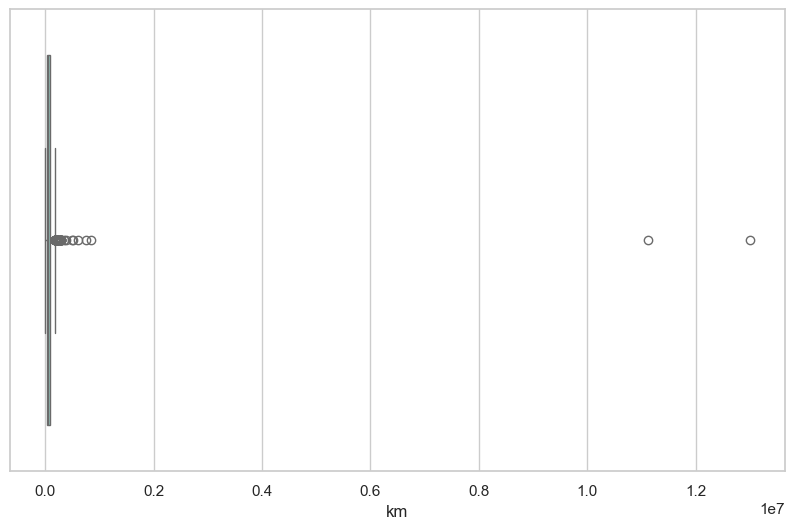

In [28]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    x="km",
    data=df_oto,
    palette="Set3"  
)
plt.show()

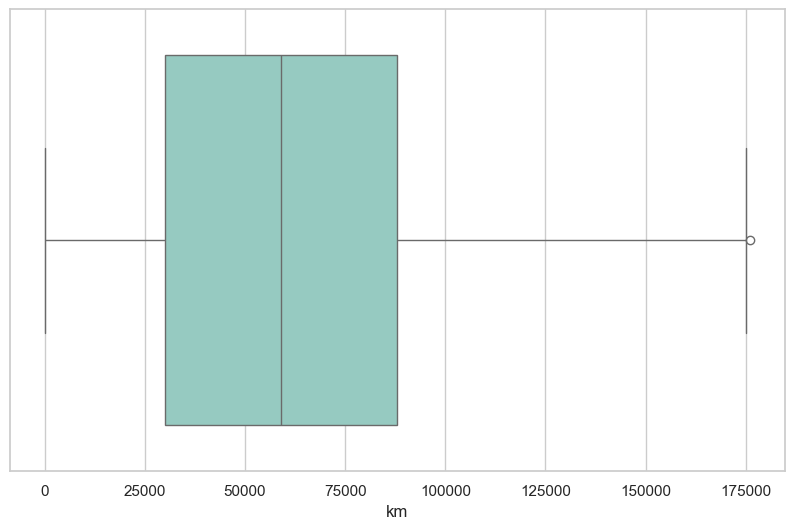

In [29]:
df_oto = remove_outliers_iqr(df_oto, 'km')
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    x="km",
    data=df_oto,
    palette="Set3"  
)
plt.show()

In [30]:
df_oto["km"].describe()

count      1381.000000
mean      60861.242578
std       38183.248926
min         110.000000
25%       30000.000000
50%       59000.000000
75%       88000.000000
max      176008.000000
Name: km, dtype: float64

7.origin

In [31]:
df_oto["Xuất_xứ"].isna().sum()

np.int64(25)

In [32]:
df_oto["Xuất_xứ"].value_counts()

Xuất_xứ
Trong nước    737
Nhập khẩu     619
Name: count, dtype: int64

In [33]:
df_oto["Xuất_xứ"].describe()

count           1356
unique             2
top       Trong nước
freq             737
Name: Xuất_xứ, dtype: object

In [34]:
df_oto = df_oto.rename(columns={"Xuất_xứ": "origin"})

In [35]:
df_oto.loc[df_oto["origin"].isna(),"origin"] = "Trong nước"

8.body

In [36]:
df_oto["Kiểu_dáng"].unique()

array(['SUV', 'Van/Minivan', 'Hatchback', 'Sedan', 'Crossover', 'Xe tải',
       'MPV', None, 'Wagon', 'Bán tải', 'Convertible', 'Coupe',
       'Sport Car'], dtype=object)

In [37]:
df_oto = df_oto.rename(columns={"Kiểu_dáng": "body"})
df_oto["body"] = df_oto["body"].str.lower().str.strip()

9.fuel

In [38]:
df_oto.head(1)

,Nhiên_liệu,body,km,Hộp_số,origin,Tỉnh_thành,Số_tiền_vay,Thời_gian_vay,Lãi_xuất,Loại_hình,Giá_trị_xe_muốn_mua,name,price,brand,age
0,Máy xăng,suv,70000,Số tự động,Trong nước,Tp.HCM,VNĐ,ThángNăm,ThángNăm,"Trả góp đều hàng thángTrả góp đều, lãi tính tr...",VNĐ,Hyundai Santa Fe 2021,780000000.0,Hyundai,4


In [39]:
df_oto["Nhiên_liệu"].unique()

array(['Máy xăng', 'Máy dầu', 'Hybrid', 'Điện'], dtype=object)

In [40]:
df_oto = df_oto.rename(columns={"Nhiên_liệu": "fuel"})
df_oto["fuel"] = df_oto["fuel"].apply(clean_fuel)

In [41]:
df_oto["fuel"].unique()

array([None, 'Hybrid', 'Điện'], dtype=object)

In [42]:
df_oto.loc[df_oto["fuel"].isna(),"fuel"] = "Khác"

In [43]:
df_oto["fuel"].unique()

array(['Khác', 'Hybrid', 'Điện'], dtype=object)

10.dropna

In [44]:
df_oto.columns

Index(['fuel', 'body', 'km', 'Hộp_số', 'origin', 'Tỉnh_thành', 'Số_tiền_vay',
       'Thời_gian_vay', 'Lãi_xuất', 'Loại_hình', 'Giá_trị_xe_muốn_mua', 'name',
       'price', 'brand', 'age'],
      dtype='object')

In [45]:
df_oto = df_oto[['fuel', 'body', 'km', 'origin', 'name','price', 'brand', 'age']]

In [46]:
df_oto = df_oto.dropna()

In [47]:
df_oto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1487
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fuel    1301 non-null   object 
 1   body    1301 non-null   object 
 2   km      1301 non-null   int64  
 3   origin  1301 non-null   object 
 4   name    1301 non-null   object 
 5   price   1301 non-null   float64
 6   brand   1301 non-null   object 
 7   age     1301 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 91.5+ KB


11.updata

In [48]:
upload_to_bigquery(df_oto, table_id=table_id, if_exists="append" )

✅ Uploaded 1301 rows to khangtestdbt.xecupredict.data_cleaned


In [49]:
# end